<a href="https://colab.research.google.com/github/patricksabry1/42028-Deep-Learning/blob/master/42028%20character_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Character Recognition model Using OpenCV & deep CNN

In [38]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
cd /content/gdrive/My Drive/42028-DL-CNN-2020/assignment-3/

/content/gdrive/My Drive/42028-DL-CNN-2020/assignment-3


# Pre-process cropped images

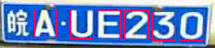

In [40]:
from google.colab.patches import cv2_imshow

# Apply canny edge detection 
def auto_canny(image, sigma=0.33):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged_image = cv.Canny(image, lower, upper)
 
    return edged_image


def crop_ctrs(img):
    ret, mask = cv2.threshold(grayimage, 254, 255, cv2.THRESH_BINARY)

    cv2.imshow('mask', mask)
    cv2.waitKey(0)

    image, contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, 
    cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:

        if cv2.contourArea(contour) < 200:
            continue

        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)

        ext_left = tuple(contour[contour[:, :, 0].argmin()][0])
        ext_right = tuple(contour[contour[:, :, 0].argmax()][0])
        ext_top = tuple(contour[contour[:, :, 1].argmin()][0])
        ext_bot = tuple(contour[contour[:, :, 1].argmax()][0])

        roi_corners = np.array([box], dtype=np.int32)

        cv2.polylines(bounding_box_image, roi_corners, 1, (255, 0, 0), 3)
        cv2.imshow('image', bounding_box_image)
        cv2.waitKey(0)

        cropped_image = grayimage[ext_top[1]:ext_bot[1], ext_left[0]:ext_right[0]]
        cv2.imwrite('crop.jpg', cropped_image)


# Sample image for debugging
img = cv.imread('/content/gdrive/My Drive/42028-DL-CNN-2020/assignment-3/cropped_dataset/validation/0397-1_0-242&362_544&472-541&472_242&462_245&362_544&372-0_0_18_4_26_27_24-128-198.jpg')

# Loop through each image, apply pre-processing & localize onto each character
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
thresh_inv = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,39,1)
edges = auto_canny(thresh_inv)
ctrs, _ = cv.findContours(edges.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv.boundingRect(ctr)[0])

img_area = img.shape[0]*img.shape[1]

for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv.boundingRect(ctr)
    roi_area = w*h
    roi_ratio = roi_area/img_area

    if((roi_ratio >= 0.04) and (roi_ratio < 0.18)):
            if ((h>1.2*w) and (3*w>=h)):
                cv.rectangle(img,(x,y),( x + w, y + h ),(90,0,255), 1)

cv2_imshow(img)